# 第2章 引言

## 用pandas对时区进行计数

In [1]:
%matplotlib inline
import json
path = "../../pydata-book/ch02/usagov_bitly_data2012-03-16-1331923249.txt"
records = [json.loads(line) for line in open(path)]
records[0]

{u'a': u'Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/535.11 (KHTML, like Gecko) Chrome/17.0.963.78 Safari/535.11',
 u'al': u'en-US,en;q=0.8',
 u'c': u'US',
 u'cy': u'Danvers',
 u'g': u'A6qOVH',
 u'gr': u'MA',
 u'h': u'wfLQtf',
 u'hc': 1331822918,
 u'hh': u'1.usa.gov',
 u'l': u'orofrog',
 u'll': [42.576698, -70.954903],
 u'nk': 1,
 u'r': u'http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/wfLQtf',
 u't': 1331923247,
 u'tz': u'America/New_York',
 u'u': u'http://www.ncbi.nlm.nih.gov/pubmed/22415991'}

In [2]:
from pandas import Series, DataFrame
import pandas as pd
import numpy as np
frame = DataFrame(records)
frame

,_heartbeat_,a,al,c,cy,g,gr,h,hc,hh,kw,l,ll,nk,r,t,tz,u
0,NaN,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,"en-US,en;q=0.8",US,Danvers,A6qOVH,MA,wfLQtf,1.331823e+09,1.usa.gov,NaN,orofrog,"[42.576698, -70.954903]",1.0,http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/...,1.331923e+09,America/New_York,http://www.ncbi.nlm.nih.gov/pubmed/22415991
1,NaN,GoogleMaps/RochesterNY,NaN,US,Provo,mwszkS,UT,mwszkS,1.308262e+09,j.mp,NaN,bitly,"[40.218102, -111.613297]",0.0,http://www.AwareMap.com/,1.331923e+09,America/Denver,http://www.monroecounty.gov/etc/911/rss.php
2,NaN,Mozilla/4.0 (compatible; MSIE 8.0; Windows NT ...,en-US,US,Washington,xxr3Qb,DC,xxr3Qb,1.331920e+09,1.usa.gov,NaN,bitly,"[38.9007, -77.043098]",1.0,http://t.co/03elZC4Q,1.331923e+09,America/New_York,http://boxer.senate.gov/en/press/releases/0316...
3,NaN,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_6_8)...,pt-br,BR,Braz,zCaLwp,27,zUtuOu,1.331923e+09,1.usa.gov,NaN,alelex88,"[-23.549999, -46.616699]",0.0,direct,1.331923e+09,America/Sao_Paulo,http://apod.nasa.gov/apod/ap120312.html
4,NaN,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,"en-US,en;q=0.8",US,Shrewsbury,9b6kNl,MA,9b6kNl,1.273672e+09,bit.ly,NaN,bitly,"[42.286499, -71.714699]",0.0,http://www.shrewsbury-ma.gov/selco/,1.331923e+09,America/New_York,http://www.shrewsbury-ma.gov/egov/gallery/1341...
5,NaN,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,"en-US,en;q=0.8",US,Shrewsbury,axNK8c,MA,axNK8c,1.273673e+09,bit.ly,NaN,bitly,"[42.286499, -71.714699]",0.0,http://www.shrewsbury-ma.gov/selco/,1.331923e+09,America/New_York,http://www.shrewsbury-ma.gov/egov/gallery/1341...
6,NaN,Mozilla/5.0 (Windows NT 5.1) AppleWebKit/535.1...,"pl-PL,pl;q=0.8,en-US;q=0.6,en;q=0.4",PL,Luban,wcndER,77,zkpJBR,1.331923e+09,1.usa.gov,NaN,bnjacobs,"[51.116699, 15.2833]",0.0,http://plus.url.google.com/url?sa=z&n=13319232...,1.331923e+09,Europe/Warsaw,http://www.nasa.gov/mission_pages/nustar/main/...
7,NaN,Mozilla/5.0 (Windows NT 6.1; rv:2.0.1) Gecko/2...,"bg,en-us;q=0.7,en;q=0.3",None,NaN,wcndER,NaN,zkpJBR,1.331923e+09,1.usa.gov,NaN,bnjacobs,NaN,0.0,http://www.facebook.com/,1.331923e+09,,http://www.nasa.gov/mission_pages/nustar/main/...
8,NaN,Opera/9.80 (X11; Linux zbov; U; en) Presto/2.1...,"en-US, en",None,NaN,wcndER,NaN,zkpJBR,1.331923e+09,1.usa.gov,NaN,bnjacobs,NaN,0.0,http://www.facebook.com/l.php?u=http%3A%2F%2F1...,1.331923e+09,,http://www.nasa.gov/mission_pages/nustar/main/...
9,NaN,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,"pt-BR,pt;q=0.8,en-US;q=0.6,en;q=0.4",None,NaN,zCaLwp,NaN,zUtuOu,1.331923e+09,1.usa.gov,NaN,alelex88,NaN,0.0,http://t.co/o1Pd0WeV,1.331923e+09,,http://apod.nasa.gov/apod/ap120312.html


In [3]:
frame.shape

(3560, 18)

In [4]:
frame.columns

Index([u'_heartbeat_', u'a', u'al', u'c', u'cy', u'g', u'gr', u'h', u'hc',
       u'hh', u'kw', u'l', u'll', u'nk', u'r', u't', u'tz', u'u'],
      dtype='object')

In [5]:
frame['tz'][:10]

0     America/New_York
1       America/Denver
2     America/New_York
3    America/Sao_Paulo
4     America/New_York
5     America/New_York
6        Europe/Warsaw
7                     
8                     
9                     
Name: tz, dtype: object

In [6]:
tz_counts = frame['tz'].value_counts()
tz_counts[:10]

America/New_York       1251
                        521
America/Chicago         400
America/Los_Angeles     382
America/Denver          191
Europe/London            74
Asia/Tokyo               37
Pacific/Honolulu         36
Europe/Madrid            35
America/Sao_Paulo        33
Name: tz, dtype: int64

In [7]:
clean_tz = frame['tz'].fillna('Missing')
clean_tz[clean_tz == ''] = 'Unknown'
tz_counts = clean_tz.value_counts()
tz_counts[:10]

America/New_York       1251
Unknown                 521
America/Chicago         400
America/Los_Angeles     382
America/Denver          191
Missing                 120
Europe/London            74
Asia/Tokyo               37
Pacific/Honolulu         36
Europe/Madrid            35
Name: tz, dtype: int64

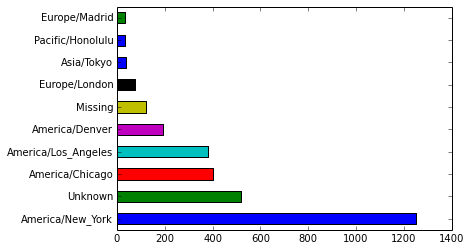

In [8]:
# 这里的参数‘barh’表示水平方向的柱状图，‘rot’是横坐标的旋转角度
tz_counts[:10].plot(kind = 'barh', rot = 0)

## MoviesLens 1M数据集

In [9]:
path = '../../pydata-book/ch02/movielens/'
unames = ['user_id', 'gender', 'age', 'occupation', 'zip']
users = pd.read_table(path + 'users.dat', sep = '::', header = None, names = unames, engine = 'python')
users

,user_id,gender,age,occupation,zip
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455
5,6,F,50,9,55117
6,7,M,35,1,06810
7,8,M,25,12,11413
8,9,M,25,17,61614
9,10,F,35,1,95370


In [10]:
rnames = ['user_id', 'movie_id', 'rating', 'timestamp']
ratings = pd.read_table(path + 'ratings.dat', sep = '::', header = None, names = rnames, engine = 'python')
ratings

,user_id,movie_id,rating,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291
5,1,1197,3,978302268
6,1,1287,5,978302039
7,1,2804,5,978300719
8,1,594,4,978302268
9,1,919,4,978301368


In [11]:
mnames = ['movie_id', 'title', 'genres']
movies = pd.read_table(path + 'movies.dat', sep = '::', header = None, names = mnames, engine = 'python')
movies

,movie_id,title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy
5,6,Heat (1995),Action|Crime|Thriller
6,7,Sabrina (1995),Comedy|Romance
7,8,Tom and Huck (1995),Adventure|Children's
8,9,Sudden Death (1995),Action
9,10,GoldenEye (1995),Action|Adventure|Thriller


In [12]:
data = pd.merge(pd.merge(ratings, users), movies)
data

,user_id,movie_id,rating,timestamp,gender,age,occupation,zip,title,genres
0,1,1193,5,978300760,F,1,10,48067,One Flew Over the Cuckoo's Nest (1975),Drama
1,2,1193,5,978298413,M,56,16,70072,One Flew Over the Cuckoo's Nest (1975),Drama
2,12,1193,4,978220179,M,25,12,32793,One Flew Over the Cuckoo's Nest (1975),Drama
3,15,1193,4,978199279,M,25,7,22903,One Flew Over the Cuckoo's Nest (1975),Drama
4,17,1193,5,978158471,M,50,1,95350,One Flew Over the Cuckoo's Nest (1975),Drama
5,18,1193,4,978156168,F,18,3,95825,One Flew Over the Cuckoo's Nest (1975),Drama
6,19,1193,5,982730936,M,1,10,48073,One Flew Over the Cuckoo's Nest (1975),Drama
7,24,1193,5,978136709,F,25,7,10023,One Flew Over the Cuckoo's Nest (1975),Drama
8,28,1193,3,978125194,F,25,1,14607,One Flew Over the Cuckoo's Nest (1975),Drama
9,33,1193,5,978557765,M,45,3,55421,One Flew Over the Cuckoo's Nest (1975),Drama


In [13]:
mean_ratings = pd.pivot_table(data, values = 'rating', index = ['title'], columns = ['gender'], aggfunc = np.mean)
mean_ratings

gender,F,M
title,,
"$1,000,000 Duck (1971)",3.375000,2.761905
'Night Mother (1986),3.388889,3.352941
'Til There Was You (1997),2.675676,2.733333
"'burbs, The (1989)",2.793478,2.962085
...And Justice for All (1979),3.828571,3.689024
1-900 (1994),2.000000,3.000000
10 Things I Hate About You (1999),3.646552,3.311966
101 Dalmatians (1961),3.791444,3.500000
101 Dalmatians (1996),3.240000,2.911215


In [14]:
mean_ratings.index

Index([u'$1,000,000 Duck (1971)', u''Night Mother (1986)',
       u''Til There Was You (1997)', u''burbs, The (1989)',
       u'...And Justice for All (1979)', u'1-900 (1994)',
       u'10 Things I Hate About You (1999)', u'101 Dalmatians (1961)',
       u'101 Dalmatians (1996)', u'12 Angry Men (1957)',
       ...
       u'Young Poisoner's Handbook, The (1995)',
       u'Young Sherlock Holmes (1985)', u'Young and Innocent (1937)',
       u'Your Friends and Neighbors (1998)', u'Zachariah (1971)',
       u'Zed & Two Noughts, A (1985)', u'Zero Effect (1998)',
       u'Zero Kelvin (Kj�rlighetens kj�tere) (1995)',
       u'Zeus and Roxanne (1997)', u'eXistenZ (1999)'],
      dtype='object', name=u'title', length=3706)

In [15]:
mean_ratings.columns

Index([u'F', u'M'], dtype='object', name=u'gender')

In [16]:
ratings_by_title = data.groupby('title').size()
ratings_by_title

title
$1,000,000 Duck (1971)                              37
'Night Mother (1986)                                70
'Til There Was You (1997)                           52
'burbs, The (1989)                                 303
...And Justice for All (1979)                      199
1-900 (1994)                                         2
10 Things I Hate About You (1999)                  700
101 Dalmatians (1961)                              565
101 Dalmatians (1996)                              364
12 Angry Men (1957)                                616
13th Warrior, The (1999)                           750
187 (1997)                                          55
2 Days in the Valley (1996)                        286
20 Dates (1998)                                    139
20,000 Leagues Under the Sea (1954)                575
200 Cigarettes (1999)                              181
2001: A Space Odyssey (1968)                      1716
2010 (1984)                                        470
24 7

In [17]:
active_titles = ratings_by_title.index[ratings_by_title >= 250]
active_titles

Index([u''burbs, The (1989)', u'10 Things I Hate About You (1999)',
       u'101 Dalmatians (1961)', u'101 Dalmatians (1996)',
       u'12 Angry Men (1957)', u'13th Warrior, The (1999)',
       u'2 Days in the Valley (1996)', u'20,000 Leagues Under the Sea (1954)',
       u'2001: A Space Odyssey (1968)', u'2010 (1984)',
       ...
       u'X-Men (2000)', u'Year of Living Dangerously (1982)',
       u'Yellow Submarine (1968)', u'You've Got Mail (1998)',
       u'Young Frankenstein (1974)', u'Young Guns (1988)',
       u'Young Guns II (1990)', u'Young Sherlock Holmes (1985)',
       u'Zero Effect (1998)', u'eXistenZ (1999)'],
      dtype='object', name=u'title', length=1216)

In [18]:
mean_ratings = mean_ratings.loc[active_titles]
mean_ratings

gender,F,M
title,,
"'burbs, The (1989)",2.793478,2.962085
10 Things I Hate About You (1999),3.646552,3.311966
101 Dalmatians (1961),3.791444,3.500000
101 Dalmatians (1996),3.240000,2.911215
12 Angry Men (1957),4.184397,4.328421
"13th Warrior, The (1999)",3.112000,3.168000
2 Days in the Valley (1996),3.488889,3.244813
"20,000 Leagues Under the Sea (1954)",3.670103,3.709205
2001: A Space Odyssey (1968),3.825581,4.129738


In [19]:
top_female_ratings = mean_ratings.sort_values(by = 'F', ascending = False)
top_female_ratings

gender,F,M
title,,
"Close Shave, A (1995)",4.644444,4.473795
"Wrong Trousers, The (1993)",4.588235,4.478261
Sunset Blvd. (a.k.a. Sunset Boulevard) (1950),4.572650,4.464589
Wallace & Gromit: The Best of Aardman Animation (1996),4.563107,4.385075
Schindler's List (1993),4.562602,4.491415
"Shawshank Redemption, The (1994)",4.539075,4.560625
"Grand Day Out, A (1992)",4.537879,4.293255
To Kill a Mockingbird (1962),4.536667,4.372611
Creature Comforts (1990),4.513889,4.272277


In [20]:
mean_ratings['diff'] = mean_ratings['M'] - mean_ratings['F']
mean_ratings

gender,F,M,diff
title,,,
"'burbs, The (1989)",2.793478,2.962085,0.168607
10 Things I Hate About You (1999),3.646552,3.311966,-0.334586
101 Dalmatians (1961),3.791444,3.500000,-0.291444
101 Dalmatians (1996),3.240000,2.911215,-0.328785
12 Angry Men (1957),4.184397,4.328421,0.144024
"13th Warrior, The (1999)",3.112000,3.168000,0.056000
2 Days in the Valley (1996),3.488889,3.244813,-0.244076
"20,000 Leagues Under the Sea (1954)",3.670103,3.709205,0.039102
2001: A Space Odyssey (1968),3.825581,4.129738,0.304156


In [21]:
sorted_by_diff = mean_ratings.sort_values(by = 'diff')
sorted_by_diff

gender,F,M,diff
title,,,
Dirty Dancing (1987),3.790378,2.959596,-0.830782
Jumpin' Jack Flash (1986),3.254717,2.578358,-0.676359
Grease (1978),3.975265,3.367041,-0.608224
Little Women (1994),3.870588,3.321739,-0.548849
Steel Magnolias (1989),3.901734,3.365957,-0.535777
Anastasia (1997),3.800000,3.281609,-0.518391
"Rocky Horror Picture Show, The (1975)",3.673016,3.160131,-0.512885
"Color Purple, The (1985)",4.158192,3.659341,-0.498851
"Age of Innocence, The (1993)",3.827068,3.339506,-0.487561


In [22]:
sorted_by_diff[::-1]

gender,F,M,diff
title,,,
"Good, The Bad and The Ugly, The (1966)",3.494949,4.221300,0.726351
"Kentucky Fried Movie, The (1977)",2.878788,3.555147,0.676359
Dumb & Dumber (1994),2.697987,3.336595,0.638608
"Longest Day, The (1962)",3.411765,4.031447,0.619682
"Cable Guy, The (1996)",2.250000,2.863787,0.613787
Evil Dead II (Dead By Dawn) (1987),3.297297,3.909283,0.611985
"Hidden, The (1987)",3.137931,3.745098,0.607167
Rocky III (1982),2.361702,2.943503,0.581801
Caddyshack (1980),3.396135,3.969737,0.573602


In [23]:
rating_std_by_title = data.groupby('title')['rating'].std()
rating_std_by_title

title
$1,000,000 Duck (1971)                            1.092563
'Night Mother (1986)                              1.118636
'Til There Was You (1997)                         1.020159
'burbs, The (1989)                                1.107760
...And Justice for All (1979)                     0.878110
1-900 (1994)                                      0.707107
10 Things I Hate About You (1999)                 0.989815
101 Dalmatians (1961)                             0.982103
101 Dalmatians (1996)                             1.098717
12 Angry Men (1957)                               0.812731
13th Warrior, The (1999)                          1.140421
187 (1997)                                        1.057919
2 Days in the Valley (1996)                       0.921592
20 Dates (1998)                                   1.151943
20,000 Leagues Under the Sea (1954)               0.869685
200 Cigarettes (1999)                             1.111964
2001: A Space Odyssey (1968)                      

In [24]:
rating_std_by_title = rating_std_by_title.loc[active_titles]
rating_std_by_title

title
'burbs, The (1989)                                                    1.107760
10 Things I Hate About You (1999)                                     0.989815
101 Dalmatians (1961)                                                 0.982103
101 Dalmatians (1996)                                                 1.098717
12 Angry Men (1957)                                                   0.812731
13th Warrior, The (1999)                                              1.140421
2 Days in the Valley (1996)                                           0.921592
20,000 Leagues Under the Sea (1954)                                   0.869685
2001: A Space Odyssey (1968)                                          1.042504
2010 (1984)                                                           0.946618
28 Days (2000)                                                        0.920278
39 Steps, The (1935)                                                  0.853501
54 (1998)                                     

In [25]:
rating_std_by_title.sort_values(ascending = False)

title
Dumb & Dumber (1994)                                                   1.321333
Blair Witch Project, The (1999)                                        1.316368
Natural Born Killers (1994)                                            1.307198
Tank Girl (1995)                                                       1.277695
Rocky Horror Picture Show, The (1975)                                  1.260177
Eyes Wide Shut (1999)                                                  1.259624
Evita (1996)                                                           1.253631
Billy Madison (1995)                                                   1.249970
Fear and Loathing in Las Vegas (1998)                                  1.246408
Bicentennial Man (1999)                                                1.245533
Hellraiser (1987)                                                      1.243046
Babe: Pig in the City (1998)                                           1.239379
Wes Craven's New Nightmare (1994) 

## 1880-2010年间全美婴儿姓名

In [26]:
path = '../../pydata-book/ch02/names/'
names1880 = pd.read_csv(path + 'yob1880.txt', names = ['name', 'sex', 'births'])
names1880

,name,sex,births
0,Mary,F,7065
1,Anna,F,2604
2,Emma,F,2003
3,Elizabeth,F,1939
4,Minnie,F,1746
5,Margaret,F,1578
6,Ida,F,1472
7,Alice,F,1414
8,Bertha,F,1320
9,Sarah,F,1288


In [27]:
names1880.groupby('sex').births.sum()

sex
F     90993
M    110493
Name: births, dtype: int64

In [28]:
years = range(1880, 2011)
pieces = []
columns = ['name', 'sex', 'births']
for year in years:
    filename = path + 'yob%d.txt' % year
    frame = pd.read_csv(filename, names = columns)
    frame['year'] = year
    pieces.append(frame)
names = pd.concat(pieces, ignore_index = True)
names

,name,sex,births,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880
5,Margaret,F,1578,1880
6,Ida,F,1472,1880
7,Alice,F,1414,1880
8,Bertha,F,1320,1880
9,Sarah,F,1288,1880


In [29]:
total_births = names.pivot_table(values = 'births', index = ['year'], columns = ['sex'], aggfunc = sum)
total_births

sex,F,M
year,,
1880,90993,110493
1881,91955,100748
1882,107851,113687
1883,112322,104632
1884,129021,114445
1885,133056,107802
1886,144538,110785
1887,145983,101412
1888,178631,120857


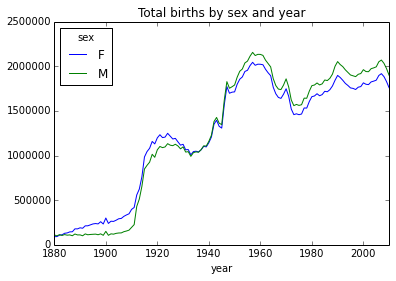

In [30]:
total_births.plot(title = 'Total births by sex and year')

In [31]:
def add_prop(group):
    births = group.births.astype(float)
    group['prop'] = births / births.sum()
    return group
names = names.groupby(['year', 'sex']).apply(add_prop)
names

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077643
1,Anna,F,2604,1880,0.028618
2,Emma,F,2003,1880,0.022013
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188
5,Margaret,F,1578,1880,0.017342
6,Ida,F,1472,1880,0.016177
7,Alice,F,1414,1880,0.015540
8,Bertha,F,1320,1880,0.014507
9,Sarah,F,1288,1880,0.014155


In [32]:
np.allclose(names.groupby(['year', 'sex']).prop.sum(), 1)

True

In [33]:
def get_top1000(group):
    return group.sort_values(by = 'births', ascending = False)[:1000]
grouped = names.groupby(['year', 'sex'])
top1000 = grouped.apply(get_top1000)
top1000

name sex  births  year      prop
year sex                                               
1880 F   0             Mary   F    7065  1880  0.077643
         1             Anna   F    2604  1880  0.028618
         2             Emma   F    2003  1880  0.022013
         3        Elizabeth   F    1939  1880  0.021309
         4           Minnie   F    1746  1880  0.019188
         5         Margaret   F    1578  1880  0.017342
         6              Ida   F    1472  1880  0.016177
         7            Alice   F    1414  1880  0.015540
         8           Bertha   F    1320  1880  0.014507
         9            Sarah   F    1288  1880  0.014155
         10           Annie   F    1258  1880  0.013825
         11           Clara   F    1226  1880  0.013474
         12            Ella   F    1156  1880  0.012704
         13        Florence   F    1063  1880  0.011682
         14            Cora   F    1045  1880  0.011484
         15          Martha   F    1040  1880  0.011429
         16           Laura   F    1012  1880  0.011122
         17          Nellie   F     995  1880  0.010935
         18           Grace   F     982  1880  0.010792
         19          Carrie   F     949  1880  0.010429
         20           Maude   F     858  1880  0.009429
         21           Mabel   F     808  1880  0.008880
         22          Bessie   F     794  1880  0.008726
         23          Jennie   F     793  1880  0.008715
         24        Gertrude   F     787  1880  0.008649
         25           Julia   F     783  1880  0.008605
         26          Hattie   F     769  1880  0.008451
         27           Edith   F     768  1880  0.008440
         28          Mattie   F     704  1880  0.007737
         29            Rose   F     700  1880  0.007693
...                     ...  ..     ...   ...       ...
2010 M   1677617       Yair   M     201  2010  0.000106
         1677616      Talan   M     201  2010  0.000106
         1677614      Keyon   M     201  2010  0.000106
         1677613       Kael   M     201  2010  0.000106
         1677618   Demarion   M     200  2010  0.000105
         1677619     Gibson   M     200  2010  0.000105
         1677620     Reagan   M     200  2010  0.000105
         1677621  Cristofer   M     199  2010  0.000105
         1677622     Daylen   M     199  2010  0.000105
         1677623     Jordon   M     199  2010  0.000105
         1677624    Dashawn   M     198  2010  0.000104
         1677625      Masen   M     198  2010  0.000104
         1677629      Rowen   M     197  2010  0.000104
         1677631     Yousef   M     197  2010  0.000104
         1677630   Thaddeus   M     197  2010  0.000104
         1677628      Kadin   M     197  2010  0.000104
         1677627     Dillan   M     197  2010  0.000104
         1677626   Clarence   M     197  2010  0.000104
         1677634      Slade   M     196  2010  0.000103
         1677632    Clinton   M     196  2010  0.000103
         1677633    Sheldon   M     196  2010  0.000103
         1677636    Keshawn   M     195  2010  0.000103
         1677637   Menachem   M     195  2010  0.000103
         1677635     Joziah   M     195  2010  0.000103
         1677638     Bailey   M     194  2010  0.000102
         1677639     Camilo   M     194  2010  0.000102
         1677640     Destin   M     194  2010  0.000102
         1677641     Jaquan   M     194  2010  0.000102
         1677642     Jaydan   M     194  2010  0.000102
         1677645     Maxton   M     193  2010  0.000102

[261877 rows x 5 columns]

In [34]:
boys = top1000[top1000.sex == 'M']
boys

name sex  births  year      prop
year sex                                               
1880 M   942           John   M    9655  1880  0.087381
         943        William   M    9533  1880  0.086277
         944          James   M    5927  1880  0.053641
         945        Charles   M    5348  1880  0.048401
         946         George   M    5126  1880  0.046392
         947          Frank   M    3242  1880  0.029341
         948         Joseph   M    2632  1880  0.023821
         949         Thomas   M    2534  1880  0.022934
         950          Henry   M    2444  1880  0.022119
         951         Robert   M    2416  1880  0.021866
         952         Edward   M    2364  1880  0.021395
         953          Harry   M    2152  1880  0.019476
         954         Walter   M    1755  1880  0.015883
         955         Arthur   M    1599  1880  0.014472
         956           Fred   M    1569  1880  0.014200
         957         Albert   M    1493  1880  0.013512
         958         Samuel   M    1024  1880  0.009268
         959          David   M     869  1880  0.007865
         960          Louis   M     828  1880  0.007494
         961            Joe   M     731  1880  0.006616
         962        Charlie   M     730  1880  0.006607
         963       Clarence   M     730  1880  0.006607
         964        Richard   M     728  1880  0.006589
         965         Andrew   M     644  1880  0.005828
         966         Daniel   M     643  1880  0.005819
         967         Ernest   M     615  1880  0.005566
         968           Will   M     588  1880  0.005322
         969          Jesse   M     569  1880  0.005150
         970          Oscar   M     544  1880  0.004923
         971          Lewis   M     517  1880  0.004679
...                     ...  ..     ...   ...       ...
2010 M   1677617       Yair   M     201  2010  0.000106
         1677616      Talan   M     201  2010  0.000106
         1677614      Keyon   M     201  2010  0.000106
         1677613       Kael   M     201  2010  0.000106
         1677618   Demarion   M     200  2010  0.000105
         1677619     Gibson   M     200  2010  0.000105
         1677620     Reagan   M     200  2010  0.000105
         1677621  Cristofer   M     199  2010  0.000105
         1677622     Daylen   M     199  2010  0.000105
         1677623     Jordon   M     199  2010  0.000105
         1677624    Dashawn   M     198  2010  0.000104
         1677625      Masen   M     198  2010  0.000104
         1677629      Rowen   M     197  2010  0.000104
         1677631     Yousef   M     197  2010  0.000104
         1677630   Thaddeus   M     197  2010  0.000104
         1677628      Kadin   M     197  2010  0.000104
         1677627     Dillan   M     197  2010  0.000104
         1677626   Clarence   M     197  2010  0.000104
         1677634      Slade   M     196  2010  0.000103
         1677632    Clinton   M     196  2010  0.000103
         1677633    Sheldon   M     196  2010  0.000103
         1677636    Keshawn   M     195  2010  0.000103
         1677637   Menachem   M     195  2010  0.000103
         1677635     Joziah   M     195  2010  0.000103
         1677638     Bailey   M     194  2010  0.000102
         1677639     Camilo   M     194  2010  0.000102
         1677640     Destin   M     194  2010  0.000102
         1677641     Jaquan   M     194  2010  0.000102
         1677642     Jaydan   M     194  2010  0.000102
         1677645     Maxton   M     193  2010  0.000102

[130997 rows x 5 columns]

In [35]:
girls = top1000[top1000.sex == 'F']
girls

name sex  births  year      prop
year sex                                               
1880 F   0             Mary   F    7065  1880  0.077643
         1             Anna   F    2604  1880  0.028618
         2             Emma   F    2003  1880  0.022013
         3        Elizabeth   F    1939  1880  0.021309
         4           Minnie   F    1746  1880  0.019188
         5         Margaret   F    1578  1880  0.017342
         6              Ida   F    1472  1880  0.016177
         7            Alice   F    1414  1880  0.015540
         8           Bertha   F    1320  1880  0.014507
         9            Sarah   F    1288  1880  0.014155
         10           Annie   F    1258  1880  0.013825
         11           Clara   F    1226  1880  0.013474
         12            Ella   F    1156  1880  0.012704
         13        Florence   F    1063  1880  0.011682
         14            Cora   F    1045  1880  0.011484
         15          Martha   F    1040  1880  0.011429
         16           Laura   F    1012  1880  0.011122
         17          Nellie   F     995  1880  0.010935
         18           Grace   F     982  1880  0.010792
         19          Carrie   F     949  1880  0.010429
         20           Maude   F     858  1880  0.009429
         21           Mabel   F     808  1880  0.008880
         22          Bessie   F     794  1880  0.008726
         23          Jennie   F     793  1880  0.008715
         24        Gertrude   F     787  1880  0.008649
         25           Julia   F     783  1880  0.008605
         26          Hattie   F     769  1880  0.008451
         27           Edith   F     768  1880  0.008440
         28          Mattie   F     704  1880  0.007737
         29            Rose   F     700  1880  0.007693
...                     ...  ..     ...   ...       ...
2010 F   1657916      Kairi   F     261  2010  0.000148
         1657917      River   F     261  2010  0.000148
         1657918    Shaylee   F     261  2010  0.000148
         1657919    Addilyn   F     260  2010  0.000148
         1657920     Alexus   F     260  2010  0.000148
         1657921    Jaslene   F     260  2010  0.000148
         1657923   Milagros   F     259  2010  0.000147
         1657924      Reina   F     259  2010  0.000147
         1657922      India   F     259  2010  0.000147
         1657925       Zuri   F     258  2010  0.000147
         1657926     Evelin   F     256  2010  0.000146
         1657927   Stephany   F     256  2010  0.000146
         1657928      Ariah   F     255  2010  0.000145
         1657929      Donna   F     255  2010  0.000145
         1657930     Pamela   F     255  2010  0.000145
         1657934    Xiomara   F     254  2010  0.000144
         1657933        Mae   F     254  2010  0.000144
         1657932      Devyn   F     254  2010  0.000144
         1657931      Amiah   F     254  2010  0.000144
         1657935    Aracely   F     253  2010  0.000144
         1657936   Bryleigh   F     253  2010  0.000144
         1657937     Lilith   F     253  2010  0.000144
         1657938      Leona   F     252  2010  0.000143
         1657939    Aleigha   F     251  2010  0.000143
         1657940    Savanah   F     251  2010  0.000143
         1657943    Violeta   F     250  2010  0.000142
         1657942     Leilah   F     250  2010  0.000142
         1657941    Alaysia   F     250  2010  0.000142
         1657945      Dania   F     249  2010  0.000142
         1657946     Yadira   F     249  2010  0.000142

[130880 rows x 5 columns]

In [36]:
total_births = top1000.pivot_table(values = 'births', index = ['year'], columns = ['name'], aggfunc = sum)
total_births

/Library/Python/2.7/site-packages/pandas/core/reshape/pivot.py:86: FutureWarning: 'year' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version
  grouped = data.groupby(keys, observed=False)


name,Aaden,Aaliyah,Aarav,Aaron,Aarush,Ab,Abagail,Abb,Abbey,Abbie,...,Zoa,Zoe,Zoey,Zoie,Zola,Zollie,Zona,Zora,Zula,Zuri
year,,,,,,,,,,,,,,,,,,,,,
1880,NaN,NaN,NaN,102.0,NaN,NaN,NaN,NaN,NaN,71.0,...,8.0,23.0,NaN,NaN,7.0,NaN,8.0,28.0,27.0,NaN
1881,NaN,NaN,NaN,94.0,NaN,NaN,NaN,NaN,NaN,81.0,...,NaN,22.0,NaN,NaN,10.0,NaN,9.0,21.0,27.0,NaN
1882,NaN,NaN,NaN,85.0,NaN,NaN,NaN,NaN,NaN,80.0,...,8.0,25.0,NaN,NaN,9.0,NaN,17.0,32.0,21.0,NaN
1883,NaN,NaN,NaN,105.0,NaN,NaN,NaN,NaN,NaN,79.0,...,NaN,23.0,NaN,NaN,10.0,NaN,11.0,35.0,25.0,NaN
1884,NaN,NaN,NaN,97.0,NaN,NaN,NaN,NaN,NaN,98.0,...,13.0,31.0,NaN,NaN,14.0,6.0,8.0,58.0,27.0,NaN
1885,NaN,NaN,NaN,88.0,NaN,6.0,NaN,NaN,NaN,88.0,...,6.0,27.0,NaN,NaN,12.0,6.0,14.0,48.0,38.0,NaN
1886,NaN,NaN,NaN,86.0,NaN,NaN,NaN,NaN,NaN,84.0,...,13.0,25.0,NaN,NaN,8.0,NaN,20.0,52.0,43.0,NaN
1887,NaN,NaN,NaN,78.0,NaN,NaN,NaN,NaN,NaN,104.0,...,9.0,34.0,NaN,NaN,23.0,NaN,28.0,46.0,33.0,NaN
1888,NaN,NaN,NaN,90.0,NaN,NaN,NaN,NaN,NaN,137.0,...,11.0,42.0,NaN,NaN,23.0,7.0,30.0,42.0,45.0,NaN


array([<matplotlib.axes.AxesSubplot object at 0x10d4d6d10>,
       <matplotlib.axes.AxesSubplot object at 0x10e2d2090>], dtype=object)

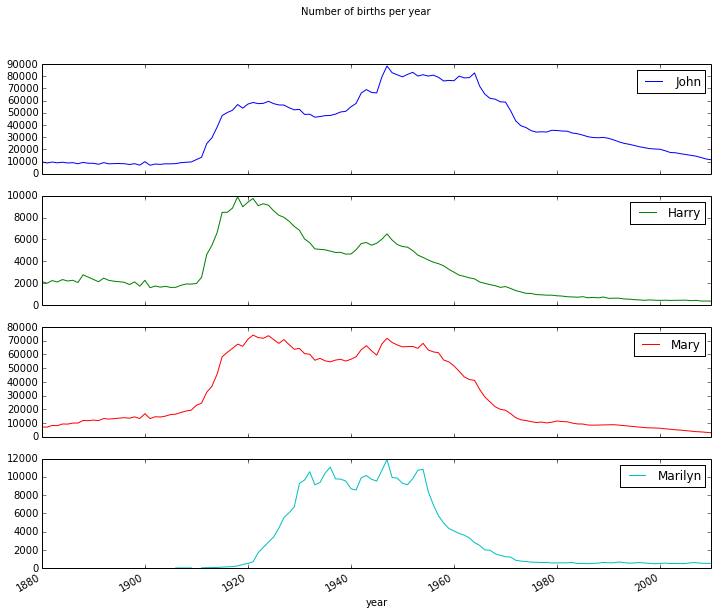

In [37]:
subset = total_births[['John', 'Harry', 'Mary', 'Marilyn']]
subset.plot(subplots = True, figsize = (12, 10), grid = False, title = 'Number of births per year')

In [38]:
table = top1000.pivot_table(values = 'prop', index = 'year', columns = 'sex', aggfunc = sum)
table

/Library/Python/2.7/site-packages/pandas/core/reshape/pivot.py:86: FutureWarning: 'sex' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version
  grouped = data.groupby(keys, observed=False)


sex,F,M
year,,
1880,1.000000,0.997375
1881,1.000000,1.000000
1882,0.998702,0.995646
1883,0.997596,0.998566
1884,0.993156,0.994539
1885,0.992251,0.995501
1886,0.989504,0.995035
1887,0.988279,0.996697
1888,0.984241,0.992429


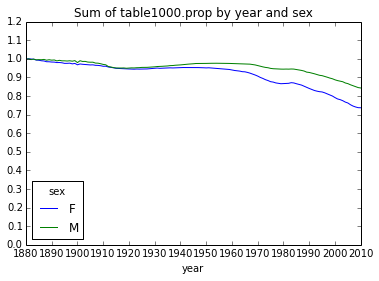

In [39]:
table.plot(title = 'Sum of table1000.prop by year and sex', yticks = np.linspace(0, 1.2, 13), xticks = range(1880, 2020, 10))

In [40]:
df = boys[boys.year == 2010]
df

name sex  births  year      prop
year sex                                                 
2010 M   1676644        Jacob   M   21875  2010  0.011523
         1676645        Ethan   M   17866  2010  0.009411
         1676646      Michael   M   17133  2010  0.009025
         1676647       Jayden   M   17030  2010  0.008971
         1676648      William   M   16870  2010  0.008887
         1676649    Alexander   M   16634  2010  0.008762
         1676650         Noah   M   16281  2010  0.008576
         1676651       Daniel   M   15679  2010  0.008259
         1676652        Aiden   M   15403  2010  0.008114
         1676653      Anthony   M   15364  2010  0.008093
         1676654       Joshua   M   15238  2010  0.008027
         1676655        Mason   M   14728  2010  0.007758
         1676656  Christopher   M   14135  2010  0.007446
         1676657       Andrew   M   14093  2010  0.007424
         1676658        David   M   14042  2010  0.007397
         1676659      Matthew   M   13954  2010  0.007350
         1676660        Logan   M   13943  2010  0.007345
         1676661       Elijah   M   13735  2010  0.007235
         1676662        James   M   13714  2010  0.007224
         1676663       Joseph   M   13657  2010  0.007194
         1676664      Gabriel   M   12722  2010  0.006701
         1676665     Benjamin   M   12280  2010  0.006469
         1676666         Ryan   M   11886  2010  0.006261
         1676667       Samuel   M   11776  2010  0.006203
         1676668      Jackson   M   11693  2010  0.006159
         1676669         John   M   11424  2010  0.006018
         1676670       Nathan   M   11269  2010  0.005936
         1676671     Jonathan   M   11028  2010  0.005809
         1676672    Christian   M   10965  2010  0.005776
         1676673         Liam   M   10852  2010  0.005716
...                       ...  ..     ...   ...       ...
         1677617         Yair   M     201  2010  0.000106
         1677616        Talan   M     201  2010  0.000106
         1677614        Keyon   M     201  2010  0.000106
         1677613         Kael   M     201  2010  0.000106
         1677618     Demarion   M     200  2010  0.000105
         1677619       Gibson   M     200  2010  0.000105
         1677620       Reagan   M     200  2010  0.000105
         1677621    Cristofer   M     199  2010  0.000105
         1677622       Daylen   M     199  2010  0.000105
         1677623       Jordon   M     199  2010  0.000105
         1677624      Dashawn   M     198  2010  0.000104
         1677625        Masen   M     198  2010  0.000104
         1677629        Rowen   M     197  2010  0.000104
         1677631       Yousef   M     197  2010  0.000104
         1677630     Thaddeus   M     197  2010  0.000104
         1677628        Kadin   M     197  2010  0.000104
         1677627       Dillan   M     197  2010  0.000104
         1677626     Clarence   M     197  2010  0.000104
         1677634        Slade   M     196  2010  0.000103
         1677632      Clinton   M     196  2010  0.000103
         1677633      Sheldon   M     196  2010  0.000103
         1677636      Keshawn   M     195  2010  0.000103
         1677637     Menachem   M     195  2010  0.000103
         1677635       Joziah   M     195  2010  0.000103
         1677638       Bailey   M     194  2010  0.000102
         1677639       Camilo   M     194  2010  0.000102
         1677640       Destin   M     194  2010  0.000102
         1677641       Jaquan   M     194  2010  0.000102
         1677642       Jaydan   M     194  2010  0.000102
         1677645       Maxton   M     193  2010  0.000102

[1000 rows x 5 columns]

In [41]:
prop_cumsum = df.sort_values(by = 'prop', ascending = False).prop.cumsum()
prop_cumsum

year  sex         
2010  M    1676644    0.011523
           1676645    0.020934
           1676646    0.029959
           1676647    0.038930
           1676648    0.047817
           1676649    0.056579
           1676650    0.065155
           1676651    0.073414
           1676652    0.081528
           1676653    0.089621
           1676654    0.097648
           1676655    0.105406
           1676656    0.112852
           1676657    0.120276
           1676658    0.127672
           1676659    0.135023
           1676660    0.142368
           1676661    0.149603
           1676662    0.156827
           1676663    0.164021
           1676664    0.170722
           1676665    0.177191
           1676666    0.183452
           1676667    0.189655
           1676668    0.195815
           1676669    0.201832
           1676670    0.207769
           1676671    0.213578
           1676672    0.219354
           1676673    0.225070
                        ...   
           1677613  

In [42]:
prop_cumsum.searchsorted(0.5)

array([116])

In [43]:
df = boys[boys.year == 1900]
in1900 = df.sort_values(by = 'prop', ascending = False).prop.cumsum()
in1900.searchsorted(0.5) + 1

array([25])

In [44]:
def get_quantile_count(group, q = 0.5):
    group = group.sort_values(by = 'prop', ascending = False)
    return group.prop.cumsum().searchsorted(q)[0] + 1
diversity = top1000.groupby(['year', 'sex']).apply(get_quantile_count)
diversity = diversity.unstack('sex')
diversity

/Library/Python/2.7/site-packages/ipykernel_launcher.py:4: FutureWarning: 'year' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version
  after removing the cwd from sys.path.
/Library/Python/2.7/site-packages/ipykernel_launcher.py:4: FutureWarning: 'sex' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version
  after removing the cwd from sys.path.


sex,F,M
year,,
1880,38,14
1881,38,14
1882,38,15
1883,39,15
1884,39,16
1885,40,16
1886,41,16
1887,41,17
1888,42,17


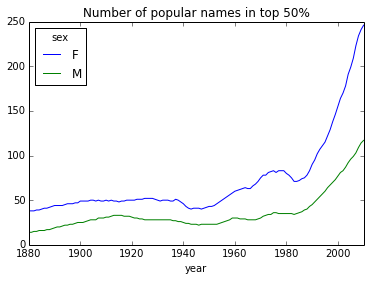

In [45]:
diversity.plot(title = 'Number of popular names in top 50%')

In [46]:
get_last_letter = lambda x: x[-1]
last_letters = names.name.map(get_last_letter)
last_letters.name = 'last_letter'
last_letters

0          y
1          a
2          a
3          h
4          e
5          t
6          a
7          e
8          a
9          h
10         e
11         a
12         a
13         e
14         a
15         a
16         a
17         e
18         e
19         e
20         e
21         l
22         e
23         e
24         e
25         a
26         e
27         h
28         e
29         e
          ..
1690754    n
1690755    n
1690756    n
1690757    n
1690758    l
1690759    n
1690760    a
1690761    o
1690762    h
1690763    i
1690764    h
1690765    n
1690766    r
1690767    n
1690768    n
1690769    n
1690770    n
1690771    i
1690772    n
1690773    b
1690774    e
1690775    t
1690776    n
1690777    r
1690778    n
1690779    e
1690780    e
1690781    s
1690782    n
1690783    x
Name: last_letter, Length: 1690784, dtype: object

In [47]:
table = names.pivot_table(values = 'births', index = last_letters, columns = ['sex', 'year'], aggfunc = sum)
table

sex                F                                                        \
year            1880     1881     1882     1883     1884     1885     1886   
last_letter                                                                  
a            31446.0  31581.0  36536.0  38330.0  43680.0  45408.0  49100.0   
b                NaN      NaN      NaN      NaN      NaN      NaN      NaN   
c                NaN      NaN      5.0      5.0      NaN      NaN      NaN   
d              609.0    607.0    734.0    810.0    916.0    862.0   1007.0   
e            33378.0  34080.0  40399.0  41914.0  48089.0  49616.0  53884.0   
f                NaN      NaN      NaN      NaN      NaN      NaN      NaN   
g                7.0      5.0     12.0      8.0     24.0     11.0     18.0   
h             4863.0   4784.0   5567.0   5701.0   6602.0   6624.0   7146.0   
i               61.0     78.0     81.0     76.0     84.0     92.0     85.0   
j                NaN      NaN      NaN      NaN      NaN      NaN      NaN   
k               13.0     15.0     11.0     17.0     21.0     18.0     27.0   
l             2541.0   2911.0   3527.0   3848.0   4808.0   5144.0   5721.0   
m               58.0     57.0     81.0     86.0     79.0     75.0    103.0   
n             3008.0   2959.0   3576.0   3837.0   4507.0   4735.0   5242.0   
o               30.0     49.0     35.0     47.0     74.0     84.0     93.0   
p                NaN      NaN      NaN      NaN      NaN      NaN      NaN   
q                NaN      NaN      NaN      NaN      NaN      NaN      NaN   
r              481.0    417.0    590.0    640.0    718.0    799.0    917.0   
s             1391.0   1316.0   1637.0   1794.0   2039.0   2127.0   2524.0   
t             2152.0   2165.0   2399.0   2554.0   2825.0   2889.0   3017.0   
u              380.0    427.0    410.0    444.0    490.0    495.0    511.0   
v                NaN      NaN      NaN      NaN      NaN      NaN      NaN   
w                NaN      5.0      NaN      NaN      NaN      NaN      5.0   
x                NaN      NaN      NaN      7.0      NaN      NaN      NaN   
y            10469.0  10404.0  12145.0  12063.0  13917.0  13927.0  14936.0   
z              106.0     95.0    106.0    141.0    148.0    150.0    202.0   

sex                                       ...            M            \
year            1887     1888     1889    ...         2001      2002   
last_letter                               ...                          
a            48942.0  59442.0  58631.0    ...      39124.0   38815.0   
b                NaN      NaN      NaN    ...      50950.0   49284.0   
c                NaN      NaN      NaN    ...      27113.0   27238.0   
d             1027.0   1298.0   1374.0    ...      60838.0   55829.0   
e            54353.0  66750.0  66663.0    ...     145395.0  144651.0   
f                NaN      NaN      NaN    ...       1758.0    1817.0   
g               25.0     44.0     28.0    ...       2151.0    2084.0   
h             7141.0   8630.0   8826.0    ...      85959.0   88085.0   
i              105.0    141.0    134.0    ...      20980.0   23610.0   
j                NaN      NaN      NaN    ...       1069.0    1088.0   
k               19.0     21.0     22.0    ...      42477.0   42043.0   
l             6175.0   7900.0   8395.0    ...     153648.0  153493.0   
m               90.0    123.0    137.0    ...      41967.0   42663.0   
n             5512.0   6833.0   7103.0    ...     616099.0  630322.0   
o               97.0    134.0    142.0    ...      82146.0   83180.0   
p                NaN      NaN      NaN    ...       3419.0    3157.0   
q                NaN      NaN      NaN    ...        602.0     618.0   
r              910.0   1207.0   1214.0    ...     165377.0  164821.0   
s             2803.0   3582.0   3569.0    ...     143791.0  139595.0   
t             3140.0   3816.0   3784.0    ...      47688.0   44991.0   
u              476.0    541.0    469.0    ...       1833.0    1819.0   
v        

In [48]:
subtable = table.reindex(columns = [1910, 1960, 2010], level = 'year')
subtable

sex                 F                            M                    
year             1910      1960      2010     1910      1960      2010
last_letter                                                           
a            108376.0  691247.0  670605.0    977.0    5204.0   28438.0
b                 NaN     694.0     450.0    411.0    3912.0   38859.0
c                 5.0      49.0     946.0    482.0   15476.0   23125.0
d              6750.0    3729.0    2607.0  22111.0  262112.0   44398.0
e            133569.0  435013.0  313833.0  28655.0  178823.0  129012.0
f                 NaN      20.0      97.0    152.0    9224.0    2255.0
g                57.0     318.0     657.0    437.0   20235.0    2666.0
h             20427.0   73247.0  133424.0   8848.0   80841.0   98090.0
i               605.0   80812.0   55820.0    164.0    1286.0   42956.0
j                 NaN       NaN     159.0      NaN       NaN    1459.0
k                48.0     315.0     626.0   7104.0  105315.0   35198.0
l             17121.0   68482.0   46360.0  12626.0  223716.0  133583.0
m               476.0   17417.0    4552.0  11272.0   72139.0   46808.0
n             31412.0  264258.0  246631.0  27851.0  325266.0  688677.0
o               658.0    4932.0    2187.0   3314.0   27358.0   81025.0
p                 7.0      47.0      35.0    616.0   12102.0    2409.0
q                 NaN       NaN      53.0      NaN       NaN     342.0
r              5308.0   13677.0   31707.0  12522.0   66183.0  166064.0
s             15477.0   25810.0   23451.0  25404.0  219080.0  123670.0
t             10877.0   30738.0   13773.0  14153.0  140015.0   43398.0
u               271.0    1161.0     734.0     24.0     122.0    2318.0
v                 NaN     122.0     205.0     22.0      78.0    2723.0
w                 8.0      63.0    2080.0   1229.0   16444.0   30656.0
x                 6.0      74.0    1279.0    770.0    3947.0   16352.0
y             43991.0  308504.0  205501.0  15021.0  343318.0  110425.0
z               967.0    1333.0    1238.0     33.0     392.0    3476.0

In [49]:
letter_prop = subtable / subtable.sum().astype(float)
letter_prop

sex                 F                             M                    
year             1910      1960      2010      1910      1960      2010
last_letter                                                            
a            0.273390  0.341853  0.381240  0.005031  0.002440  0.014980
b                 NaN  0.000343  0.000256  0.002116  0.001834  0.020470
c            0.000013  0.000024  0.000538  0.002482  0.007257  0.012181
d            0.017028  0.001844  0.001482  0.113858  0.122908  0.023387
e            0.336941  0.215133  0.178415  0.147556  0.083853  0.067959
f                 NaN  0.000010  0.000055  0.000783  0.004325  0.001188
g            0.000144  0.000157  0.000374  0.002250  0.009488  0.001404
h            0.051529  0.036224  0.075852  0.045562  0.037907  0.051670
i            0.001526  0.039965  0.031734  0.000844  0.000603  0.022628
j                 NaN       NaN  0.000090       NaN       NaN  0.000769
k            0.000121  0.000156  0.000356  0.036581  0.049384  0.018541
l            0.043189  0.033867  0.026356  0.065016  0.104904  0.070367
m            0.001201  0.008613  0.002588  0.058044  0.033827  0.024657
n            0.079240  0.130687  0.140210  0.143415  0.152522  0.362771
o            0.001660  0.002439  0.001243  0.017065  0.012829  0.042681
p            0.000018  0.000023  0.000020  0.003172  0.005675  0.001269
q                 NaN       NaN  0.000030       NaN       NaN  0.000180
r            0.013390  0.006764  0.018025  0.064481  0.031034  0.087477
s            0.039042  0.012764  0.013332  0.130815  0.102730  0.065145
t            0.027438  0.015201  0.007830  0.072879  0.065655  0.022861
u            0.000684  0.000574  0.000417  0.000124  0.000057  0.001221
v                 NaN  0.000060  0.000117  0.000113  0.000037  0.001434
w            0.000020  0.000031  0.001182  0.006329  0.007711  0.016148
x            0.000015  0.000037  0.000727  0.003965  0.001851  0.008614
y            0.110972  0.152569  0.116828  0.077349  0.160987  0.058168
z            0.002439  0.000659  0.000704  0.000170  0.000184  0.001831

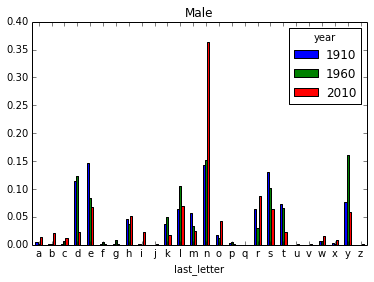

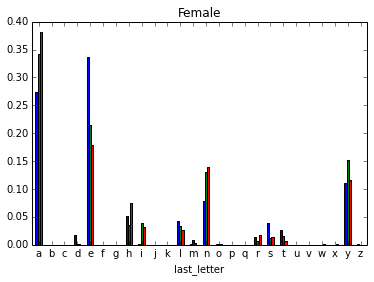

In [50]:
letter_prop['M'].plot(kind = 'bar', rot = 0, title = 'Male')
letter_prop['F'].plot(kind = 'bar', rot = 0, title = 'Female', legend = False)

In [51]:
letter_prop = table / table.sum().astype(float)
letter_prop

sex                 F                                                    \
year             1880      1881      1882      1883      1884      1885   
last_letter                                                               
a            0.345587  0.343440  0.338764  0.341251  0.338550  0.341270   
b                 NaN       NaN       NaN       NaN       NaN       NaN   
c                 NaN       NaN  0.000046  0.000045       NaN       NaN   
d            0.006693  0.006601  0.006806  0.007211  0.007100  0.006478   
e            0.366819  0.370616  0.374582  0.373159  0.372722  0.372896   
f                 NaN       NaN       NaN       NaN       NaN       NaN   
g            0.000077  0.000054  0.000111  0.000071  0.000186  0.000083   
h            0.053444  0.052025  0.051618  0.050756  0.051170  0.049784   
i            0.000670  0.000848  0.000751  0.000677  0.000651  0.000691   
j                 NaN       NaN       NaN       NaN       NaN       NaN   
k            0.000143  0.000163  0.000102  0.000151  0.000163  0.000135   
l            0.027925  0.031657  0.032703  0.034259  0.037265  0.038660   
m            0.000637  0.000620  0.000751  0.000766  0.000612  0.000564   
n            0.033057  0.032179  0.033157  0.034161  0.034932  0.035587   
o            0.000330  0.000533  0.000325  0.000418  0.000574  0.000631   
p                 NaN       NaN       NaN       NaN       NaN       NaN   
q                 NaN       NaN       NaN       NaN       NaN       NaN   
r            0.005286  0.004535  0.005471  0.005698  0.005565  0.006005   
s            0.015287  0.014311  0.015178  0.015972  0.015804  0.015986   
t            0.023650  0.023544  0.022244  0.022738  0.021896  0.021713   
u            0.004176  0.004644  0.003802  0.003953  0.003798  0.003720   
v                 NaN       NaN       NaN       NaN       NaN       NaN   
w                 NaN  0.000054       NaN       NaN       NaN       NaN   
x                 NaN       NaN       NaN  0.000062       NaN       NaN   
y            0.115053  0.113142  0.112609  0.107397  0.107866  0.104670   
z            0.001165  0.001033  0.000983  0.001255  0.001147  0.001127   

sex                                                    ...            M  \
year             1886      1887      1888      1889    ...         2001   
last_letter                                            ...                
a            0.339703  0.335258  0.332764  0.328706    ...     0.020162   
b                 NaN       NaN       NaN       NaN    ...     0.026256   
c                 NaN       NaN       NaN       NaN    ...     0.013972   
d            0.006967  0.007035  0.007266  0.007703    ...     0.031352   
e            0.372802  0.372324  0.373675  0.373736    ...     0.074927   
f                 NaN       NaN       NaN       NaN    ...     0.000906   
g            0.000125  0.000171  0.000246  0.000157    ...     0.001108   
h            0.049440  0.048917  0.048312  0.049482    ...     0.044297   
i            0.000588  0.000719  0.000789  0.000751    ...     0.010812   
j                 NaN       NaN       NaN       NaN    ...     0.000551   
k            0.000187  0.000130  0.000118  0.000123    ...     0.021890   
l            0.039581  0.042299  0.044225  0.047065    ...     0.079180   
m            0.000713  0.000617  0.000689  0.000768    ...     0.021627   
n            0.036267  0.037758  0.038252  0.039822    ...     0.317495   
o            0.000643  0.000664  0.000750  0.000796    ...     0.042332   
p                 NaN       NaN       NaN       NaN    ...     0.001762   
q                 NaN       NaN       NaN       NaN    ...     0.000310   
r            0.006344  0.006234  0.006757  0.006806    ...     0.085224   
s            0.017463  0.019201  0.020053  0.020009    ...     0.074100   
t            0.020873  0.021509  0.021362  0.021214    ...     0.024575   
u            0.003535  0.003261  0.003029  0.002629    ...     0.000945   
v                 NaN   

In [52]:
dny_ts = letter_prop.loc[['d', 'n', 'y'], 'M'].T
dny_ts

last_letter,d,n,y
year,,,
1880,0.083055,0.153213,0.075760
1881,0.083247,0.153214,0.077451
1882,0.085340,0.149560,0.077537
1883,0.084066,0.151646,0.079144
1884,0.086120,0.149915,0.080405
1885,0.085472,0.146361,0.081882
1886,0.087647,0.149659,0.081681
1887,0.089072,0.148838,0.082870
1888,0.087707,0.151286,0.084919


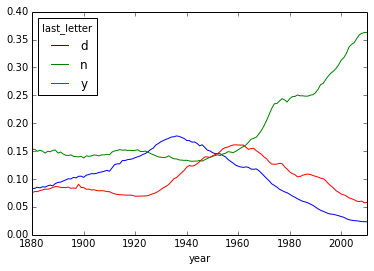

In [53]:
dny_ts.plot()

In [54]:
all_names = top1000.name.unique()
all_names

array(['Mary', 'Anna', 'Emma', ..., 'Yousef', 'Joziah', 'Maxton'],
      dtype=object)

In [55]:
mask = np.array(['lesl' in x.lower() for x in all_names])
mask

array([False, False, False, ..., False, False, False])

In [56]:
lesley_like = all_names[mask]
lesley_like

array(['Leslie', 'Lesley', 'Leslee', 'Lesli', 'Lesly'], dtype=object)

In [57]:
filtered = top1000[top1000.name.isin(lesley_like)]
filtered

name sex  births  year      prop
year sex                                            
1880 F   654      Leslie   F       8  1880  0.000088
     M   1108     Leslie   M      79  1880  0.000715
1881 F   2523     Leslie   F      11  1881  0.000120
     M   3072     Leslie   M      92  1881  0.000913
1882 F   4593     Leslie   F       9  1882  0.000083
     M   5081     Leslie   M     122  1882  0.001073
         5865     Lesley   M       6  1882  0.000053
1883 F   6850     Leslie   F       7  1883  0.000062
     M   7225     Leslie   M     120  1883  0.001147
         8093     Lesley   M       5  1883  0.000048
1884 F   8697     Leslie   F      15  1884  0.000116
     M   9432     Leslie   M     125  1884  0.001092
1885 F   11161    Leslie   F      10  1885  0.000075
     M   11751    Leslie   M     122  1885  0.001132
1886 F   13601    Leslie   F       8  1886  0.000055
     M   14132    Leslie   M     136  1886  0.001228
1887 F   15806    Leslie   F      12  1887  0.000082
     M   16524    Leslie   M     166  1887  0.001637
1888 F   18030    Leslie   F      23  1888  0.000129
     M   19074    Leslie   M     175  1888  0.001448
1889 F   20690    Leslie   F      23  1889  0.000129
     M   21737    Leslie   M     155  1889  0.001402
1890 F   23332    Leslie   F      20  1890  0.000105
     M   24372    Leslie   M     181  1890  0.001630
1891 F   25928    Leslie   F      28  1891  0.000151
     M   27068    Leslie   M     164  1891  0.001621
1892 F   28704    Leslie   F      22  1892  0.000104
     M   29851    Leslie   M     207  1892  0.001696
1893 F   31576    Leslie   F      26  1893  0.000122
     M   32765    Leslie   M     185  1893  0.001647
...                  ...  ..     ...   ...       ...
2000 F   1332261  Leslie   F    3619  2000  0.001995
         1332560   Lesly   F     742  2000  0.000409
         1332601  Lesley   F     658  2000  0.000363
2001 F   1362012  Leslie   F    3610  2001  0.002007
         1362300   Lesly   F     801  2001  0.000445
         1362452  Lesley   F     509  2001  0.000283
2002 F   1392272  Leslie   F    3520  2002  0.001962
         1392586   Lesly   F     717  2002  0.000400
         1392743  Lesley   F     471  2002  0.000262
2003 F   1422818  Leslie   F    3635  2003  0.001992
         1423091   Lesly   F     838  2003  0.000459
         1423330  Lesley   F     451  2003  0.000247
2004 F   1453982  Leslie   F    3497  2004  0.001908
         1454295   Lesly   F     747  2004  0.000408
         1454500  Lesley   F     450  2004  0.000245
2005 F   1486010  Leslie   F    3120  2005  0.001692
         1486308   Lesly   F     783  2005  0.000425
         1486623  Lesley   F     381  2005  0.000207
2006 F   1518523  Leslie   F    3035  2006  0.001600
         1518834   Lesly   F     761  2006  0.000401
         1519161  Lesley   F     370  2006  0.000195
2007 F   1552581  Leslie   F    2689  2007  0.001403
         1552882   Lesly   F     765  2007  0.000399
         1553271  Lesley   F     351  2007  0.000183
2008 F   1587484  Leslie   F    2323  2008  0.001233
         1587788   Lesly   F     699  2008  0.000371
2009 F   1622503  Leslie   F    1975  2009  0.001081
         1622845   Lesly   F     598  2009  0.000327
2010 F   1657142  Leslie   F    1558  2010  0.000886
         1657525   Lesly   F     502  2010  0.000285

[400 rows x 5 columns]

In [58]:
filtered.groupby('name').births.sum()

name
Leslee      1082
Lesley     35022
Lesli        929
Leslie    370429
Lesly      10067
Name: births, dtype: int64

In [59]:
table = filtered.pivot_table(values = 'births', index = 'year', columns = 'sex', aggfunc = sum)
table

sex,F,M
year,,
1880,8.0,79.0
1881,11.0,92.0
1882,9.0,128.0
1883,7.0,125.0
1884,15.0,125.0
1885,10.0,122.0
1886,8.0,136.0
1887,12.0,166.0
1888,23.0,175.0


In [60]:
table = table.div(table.sum(1), axis = 0)
table

sex,F,M
year,,
1880,0.091954,0.908046
1881,0.106796,0.893204
1882,0.065693,0.934307
1883,0.053030,0.946970
1884,0.107143,0.892857
1885,0.075758,0.924242
1886,0.055556,0.944444
1887,0.067416,0.932584
1888,0.116162,0.883838


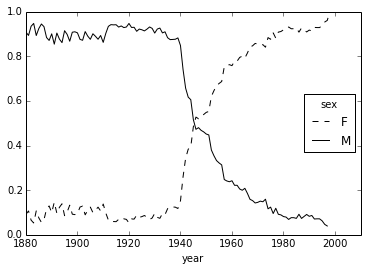

In [61]:
table.plot(style = {'M': 'k-', 'F': 'k--'})